In [1]:
import keras
import numpy as np
from keras import datasets
from keras import models
from keras.layers import Dense, Dropout, Flatten, Activation
import matplotlib.pyplot as plt
from keras.optimizers import Adam

Using TensorFlow backend.


CIFAR 데이터를 분류할 모텔 생성

In [2]:
class CifarDNN(object):
    def __init__(self, img_shape, class_num, epoch = 10, batch_size = 32, learning_rate = 0.001, actf = 'relu', 
                     layer1 = 64, layer2 = 32,  drop_rate = 0.2, val_split = 0.2):
        self.epoch = epoch
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.actf = actf
        self.layer1 = layer1
        self.layer2 = layer2
        self.img_shape = img_shape
        self.class_num = class_num
        self.drop_rate = drop_rate
        self.val_split = val_split
        
        
        self.model = self.build_model()
    
    # cifar 분류에 사용될 neural network 설정
    def build_model(self):
        model = models.Sequential()
        model.add(Dense(self.layer1, input_shape = (self.img_shape,), name = "HiddenLayer1"))
        model.add(Activation(self.actf))
        model.add(Dropout(self.drop_rate))
        
        model.add(Dense(self.layer2, name = "HiddenLayer2"))
        model.add(Activation(self.actf))
        model.add(Dropout(self.drop_rate))
            
        model.add(Dense(self.class_num))
        model.add(Activation('softmax'))
        
        model.compile(loss = 'categorical_crossentropy', optimizer = Adam(lr = self.learning_rate)
                          ,metrics = ['accuracy'])
            
        return model   
    
    # 모델학습
    def train(self, X_train, Y_train):
        self.history = self.model.fit(X_train, Y_train, epochs = self.epoch, 
                                          batch_size = self.batch_size, validation_split = self.val_split)
        return self.history
            
    # 모델평가        
    def show_eval(self, X_test, Y_test, batch_test_size = 10):
        self.result = self.model.evaluate(X_test, Y_test, batch_size = batch_test_size)
        
        return self.result

In [3]:
#  data pre-processing function
def data_load(data):
    (X_train, Y_train), (X_test, Y_test) = data.load_data()
    
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    
    Y_train = keras.utils.to_categorical(Y_train)
    Y_test = keras.utils.to_categorical(Y_test)
    
    L, W, H, C = X_train.shape
    X_train = X_train.reshape(-1, W*H*C)
    X_test = X_test.reshape(-1, W*H*C)
    
    X_train /= 255.
    X_test /= 255.
    
    return (X_train, Y_train), (X_test, Y_test)

In [22]:
(X_train, Y_train), (X_test, Y_test) = data_load(datasets.cifar10)
cifar_model = CifarDNN(img_shape = X_train.shape[1], class_num = Y_train.shape[1])
history_train = cifar_model.train(X_train, Y_train)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 8s 191us/step - loss: 2.1364 - acc: 0.1828 - val_loss: 1.9935 - val_acc: 0.2381
Epoch 2/10
40000/40000 [==============================] - 7s 183us/step - loss: 2.0183 - acc: 0.2264 - val_loss: 1.9279 - val_acc: 0.2710
Epoch 3/10
40000/40000 [==============================] - 7s 185us/step - loss: 1.9815 - acc: 0.2450 - val_loss: 1.9080 - val_acc: 0.2873
Epoch 4/10
40000/40000 [==============================] - 7s 176us/step - loss: 1.9709 - acc: 0.2480 - val_loss: 1.9188 - val_acc: 0.2829
Epoch 5/10
40000/40000 [==============================] - 7s 167us/step - loss: 1.9574 - acc: 0.2536 - val_loss: 1.9139 - val_acc: 0.2877
Epoch 6/10
40000/40000 [==============================] - 7s 170us/step - loss: 1.9562 - acc: 0.2581 - val_loss: 1.8817 - val_acc: 0.2994
Epoch 7/10
40000/40000 [==============================] - 7s 174us/step - loss: 1.9481 - acc: 0.2613 - val_loss: 1.8923 - 

In [5]:
result = cifar_model.show_eval(X_test, Y_test)
print('Test Loss : ', result[0])
print('Test Accuracy : ', result[1]*100, '%')

10000/10000 [==============================] - 1s 116us/step
Test Loss :  1.9105729835033416
Test Accuracy :  29.410000583529474 %


In [21]:
print('predict clas : ',cifar_model.model.predict_classes(X_test[:3]))
print('actual class : ', np.where(Y_test[:3])[1])

predict clas :  [3 8 8]
actual class :  [3 8 8]


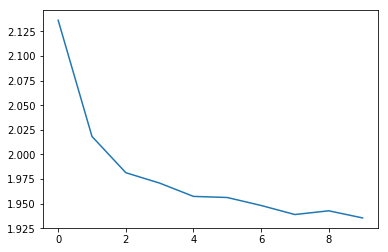

In [24]:
plt.plot(history_train.history['loss'])

In [ ]:
# 모듈 따로 만들기 따로 만들기 클래스만 있는거 cifar10_DNN처럼 
# ex) CifarDNN, CifarVGG ...

# CifarNETS : CifarNETS 안에 모델만 따로 만들기, build_model에 사용
# utils : data_load, 사진, history plot 등등